# Machine Learning Project for School Resource Allocations
## Estrella Arellano

## Overview:
### Objective
Given various student data collected from two Portuguese schools with students from 15-22 years old, a machine learning model will be created to predict a student's performance based on select attributes.  This model will be used to identify students that could benefit from additional assistance and interventions to improve their grade in the course.  

### Framing the Problem
Supervised online learning will be utilized for this task.  Supervised learning is where you train a model on labeled examples to be able to predict outcomes (in this case: student's performance) on new, unseen data (new students), and online learning uses algorithms that learn incrementally where the system is trained by individual instances or mini-batches of data.  

### Machine Learning Task
Regression analysis will be used to predict the final numerical grades (from 0 to 20) for the students as opposed to a classification analysis that would only predict if the student would pass or fail the course.  Regression analysis also gives the opportunity to identify "potential risk" students that are possible borderline cases.

### Performance Metrics
Root Mean Squared Error (RMSE) will be used to measure the predictive model's accuracy.  RMSE is the square root of the average of the differences between predicted G3 grades and actual G3 grades (a lower RMSE indicates better model performance).  R Squared will also be used as a final performance metric to compare all four models; a higher R squared value indicates that the model fits the data well, meaning that the student's final grades is well-explained by the selected student's attributes/features.

### Additional Info
A total of four regression models will be created (with and without G1 and G2 grade terms) and their performances will be compared to each other in attempts to find a suitable predictive model for the student's G3 final grades based on selected attributes for the student.

## Get the Data:

### Import the Data
Importing the data is loading the dataset (csv file) that will be used for training (X_train, y_train), testing (X_test, y_test), and evaluating the four machine learning models.

In [1]:
# import needed libraries to perform analysis 
import pandas as pd
import numpy as np

In [2]:
# import the csv file with student's data as a DataFrame (similar output to excel file)
students = pd.read_csv('student-mat.csv')

### Checking the Size and Type of Data

In [3]:
# reviewing the columns, checking the total count of non-null entries, and analyzing the data types associated with each column
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

### Features and Their Data Descriptions

Features/Attributes
1. school - student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex ("F" - female or "M" - male)
3. age - student's age (numeric from 15 to 22)
4. address - student's home address type ("U" - urban or "R" - rural)
5. famsize - family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status ("T" - living together or "A" - apart)
7. Medu - mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job ( "teacher", "health" care related, civil "services" (e.g. administrative
or police), "at_home" or "other")
10. Fjob - father's job ("teacher", "health" care related, civil "services" (e.g. administrative or
police), "at_home" or "other")
11. reason - reason to choose this school (close to "home", school "reputation", "course"
preference or "other")
12. guardian - student's guardian ("mother", "father" or "other")
13. traveltime - home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1
hour, or 4 - >1 hour)
14. studytime - weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10
hours)
15. failures - number of past class failures (n if 1<=n<3, else 4)
16. schoolsup - extra educational support (yes or no)
17. famsup - family educational support (yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (yes or no)
19. activities - extra-curricular activities (yes or no)
20. nursery - attended nursery school (yes or no)
21. higher - wants to take higher education (yes or no)
22. internet - Internet access at home (yes or no)
23. romantic - with a romantic relationship (yes or no)
24. famrel - quality of family relationships (from 1 - very bad to 5 - excellent)
25. freetime - free time after school (from 1 - very low to 5 - very high)
26. goout - going out with friends (from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (from 1 - very low to 5 - very high)
29. health - current health status (from 1 - very bad to 5 - very good)
30. absences_G1 - number of school absences for G1 term (numeric)
31. absences_G2 - number of school absences for G2 term (numeric)
32. absences_G3 - number of school absences for G3 term (numeric)
# These grades are related with the course (math subject):
33. G1 - first term grade (numeric: from 0 to 20)
34. G2 - second term grade (numeric: from 0 to 20)
35. G3 - final grade (numeric: from 0 to 20, ← this is our output target)

### Identify the Target Attribute
The target attributes are the numerical final grades for the students.  Since we are trying to predict the final grade of a student, we are saving the "G3" column as a Series named student_final_grades.  We drop the "G3" column from the students DataFrame and the remaining columns are the "student_features", which are the attributes of the students.

In [4]:
# these are our targets 
student_final_grades = pd.Series(students["G3"].copy())

In [5]:
# these are our features
student_features = students.drop('G3', axis=1)

### Split Data into Training and Test Set
Scikit-learn's train_test_split function employs the student_features and student_final_grades variables to partition the data into a training set and a test set.  80% of the instances (observations) are allocated for training and 20% for testing. The random_state is set to 42 to ensure reproducibility of the results. The resulting DataFrames have the following names: X_train, X_test, y_train, and y_test.

In [6]:
from sklearn.model_selection import train_test_split

# splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(student_features, student_final_grades, test_size=0.2, random_state=42)

## Explore the Data:
Exploring the data statistically and visually is vital to be able to select the most significant features/attributes for the models to make better predictions of the student's G3 final grades.  

The head() function looks at an overview of the first five rows of data throughout the training features from the students dataset.

In [7]:
# reviewing first five rows of features training data
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
181,GP,M,16.0,U,GT3,T,3,3,services,other,...,2,3,1,2,3,0.0,0.0,2.0,12,13
194,GP,M,16.0,U,GT3,T,2,3,other,other,...,3,3,1,1,3,0.0,0.0,0.0,13,14
173,GP,F,16.0,U,GT3,T,1,3,at_home,services,...,3,5,1,1,3,0.0,0.0,0.0,8,7
63,GP,F,16.0,U,GT3,T,4,3,teacher,health,...,4,4,2,4,4,0.0,0.0,2.0,10,9
253,GP,M,16.0,R,GT3,T,2,1,other,other,...,3,2,1,3,3,0.0,0.0,0.0,8,9


The describe function allows us to see descriptive statistics for the numerical features/attributes, including the average for the group, min/max values, count, and quartile distribution.  Upon reviewing the data, 'absences_G1' and 'absences G2' are exactly the same, so further analysis is needed. 

In [8]:
# checking descriptive statistics for each feature/attribute in the training dataset
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
count,305.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000
mean,16.747541,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,0.704918,0.704918,4.488525,10.933544,10.651899
std,1.274188,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,1.373435,1.373435,5.824238,3.216823,3.755930
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000


It is important to note the average and standard deviation of the target training set as 10.33 and 4.59 respectively.  An average of 10.33 is the US equivalent to a C average.

In [9]:
# checking descriptive statistics for target (G3 final grades) training set
y_train.describe()

count    316.000000
mean      10.325949
std        4.590337
min        0.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       20.000000
Name: G3, dtype: float64

Gabriel Pereira (GP) students represent 89% of the dataset and Mousinho da Silveira (MS) students only represent 11% of the dataset.  Additional information as to why the percentages are so vastly different would be luminary to analyze results properly.

In [10]:
#  checking value count percentages for "school" feature
X_train['school'].value_counts(normalize=True)

school
GP    0.892405
MS    0.107595
Name: proportion, dtype: float64

78% of the students in this dataset have an "urban" home address, while 22% have a "rural" home address.  Will be exploring further to see if there is a difference in scholastic performance between urban and rural students.

In [11]:
#  checking value count percentages for "address" feature
X_train['address'].value_counts(normalize=True)

address
U    0.781646
R    0.218354
Name: proportion, dtype: float64

The following shows the percentage breakdown of "traveltime" which is a categorical feature/attribute.  Will be exploring further to see if there is a difference in scholastic performance between students with longer travel times to school.

In [12]:
#  checking value count percentages for "traveltime" feature
X_train['traveltime'].value_counts(normalize=True)

traveltime
1    0.664557
2    0.259494
3    0.056962
4    0.018987
Name: proportion, dtype: float64

### Visualizations
Visualizations are crucial in exploratory data analysis because they help: understand data distributions, identify patterns and potential outliers which is necessary to make informed decisions.

Using matplotlib library to plot histograms of the numerical datatype columns within the training features and seeing the frequency distribution of each group. Upon inspection, histograms 2-12 have been encoded, meaning that their single digit numerical values represent categorical data.

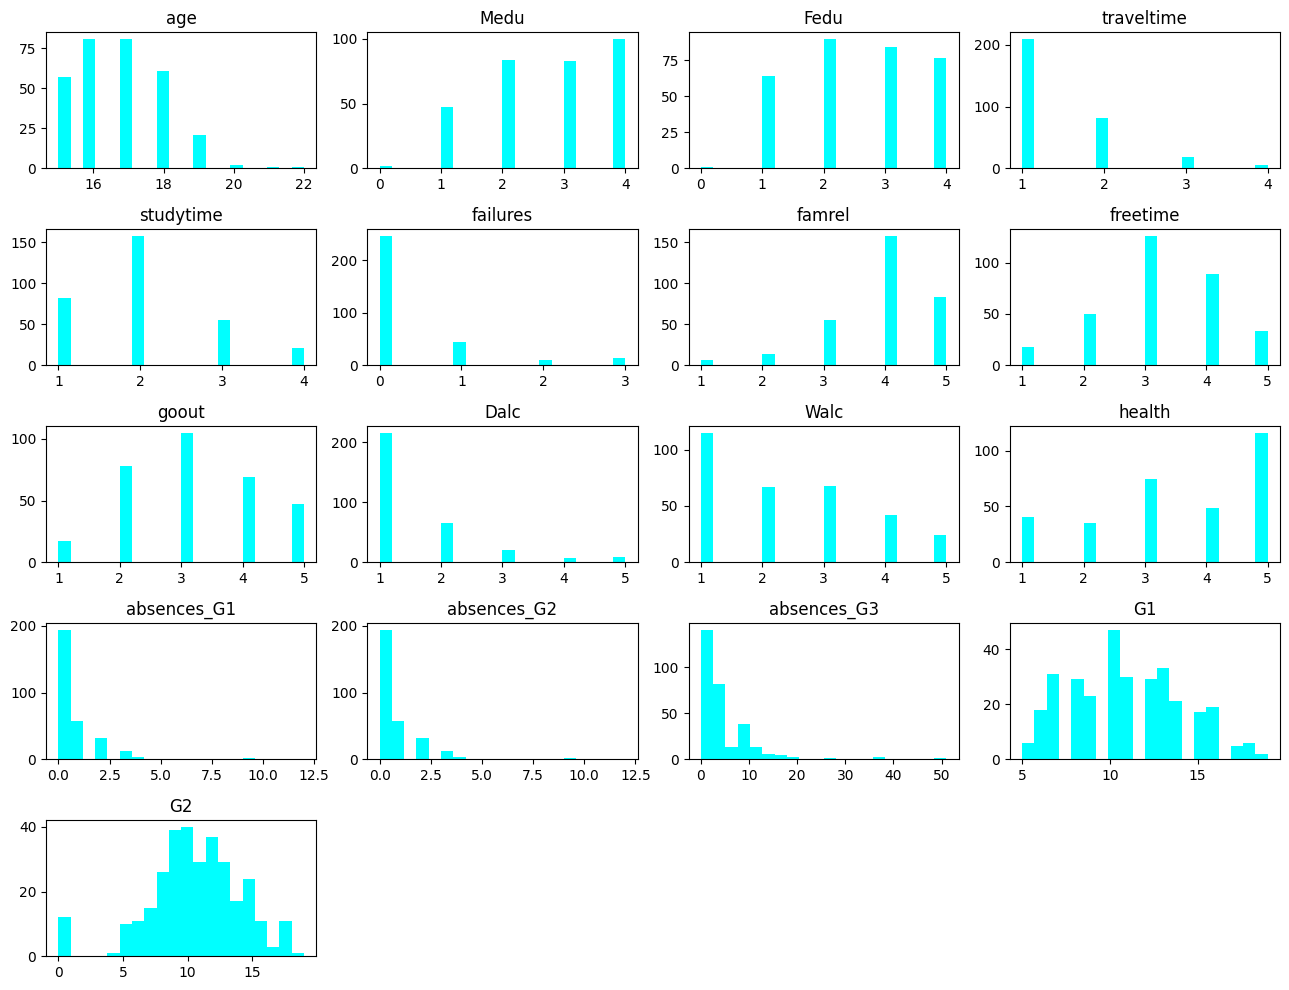

In [13]:
import matplotlib.pyplot as plt

# plotting numerical features as histograms 
X_train.hist(bins=20, figsize=(13, 10), color = 'cyan', grid = False)
plt.tight_layout()
plt.show()

Boxplots provide a wealth of knowledge about the distribution of the student dataset at a quick glance.  They display the median (center line in box), the interquartile range (IQR), which is the difference between the third quartile (Q3-top edge of box) and the first quartile (Q1-bottom edge of box), along with any potential outliers (dots outside of boxplot) for comparing groups/categories.  Below are boxplots for all the categorical features for comparison (researched 'stackoverflow' for help to create the iteration).  

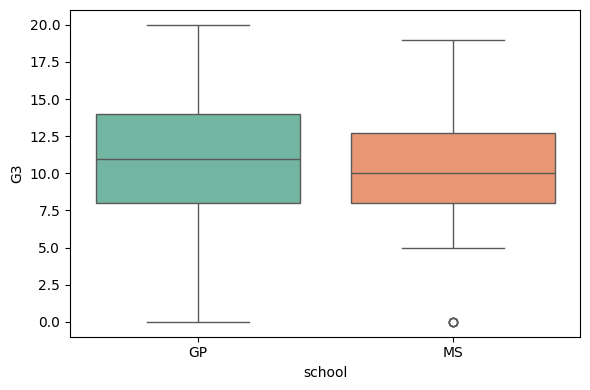

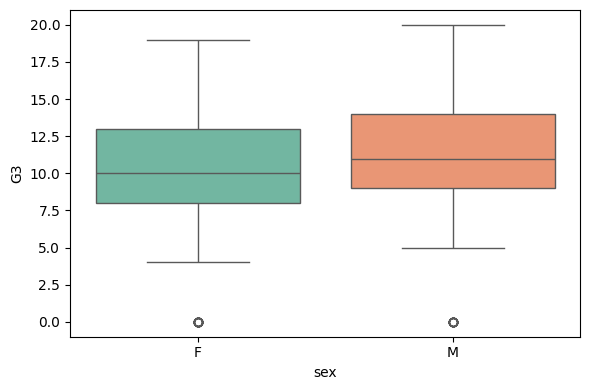

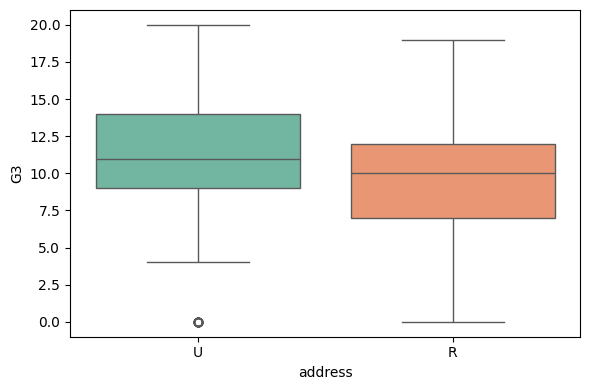

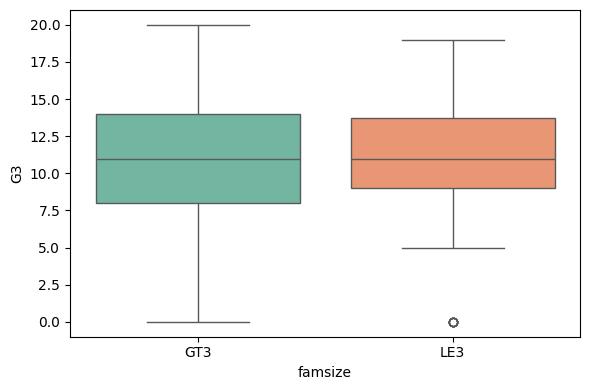

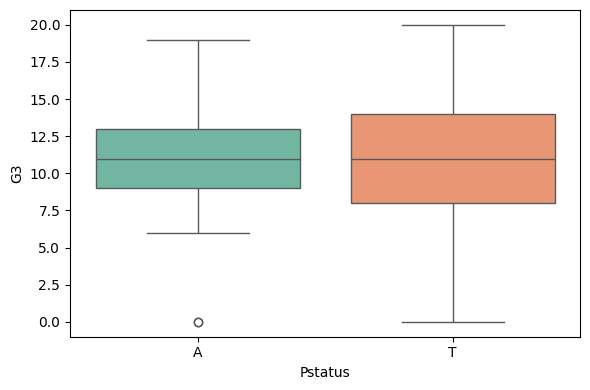

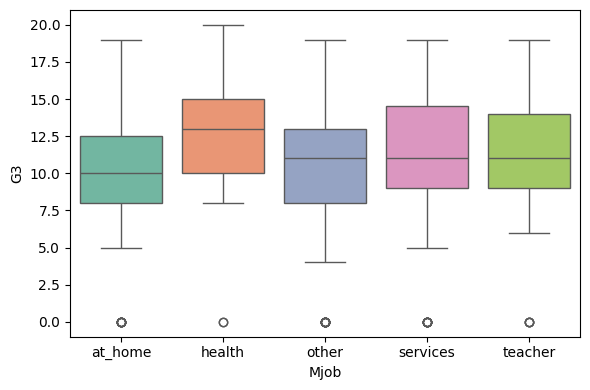

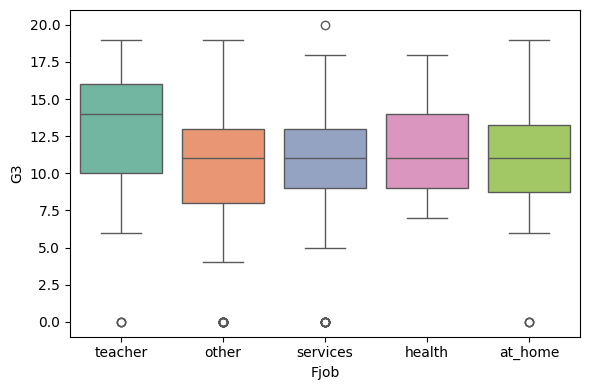

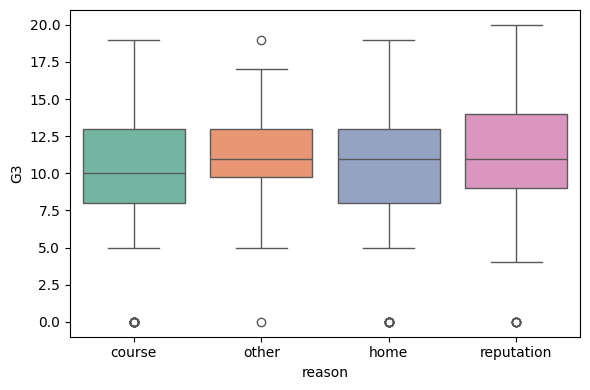

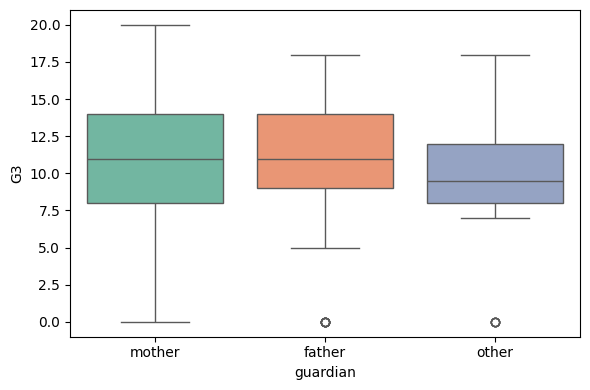

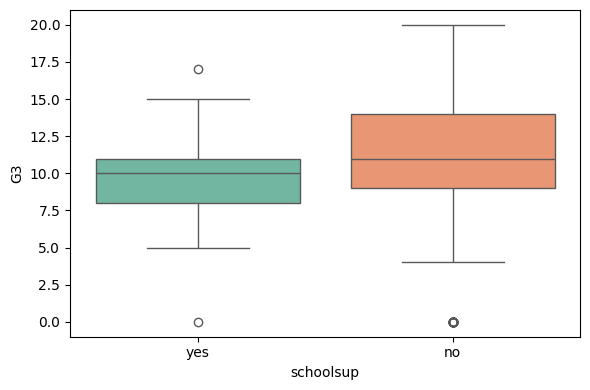

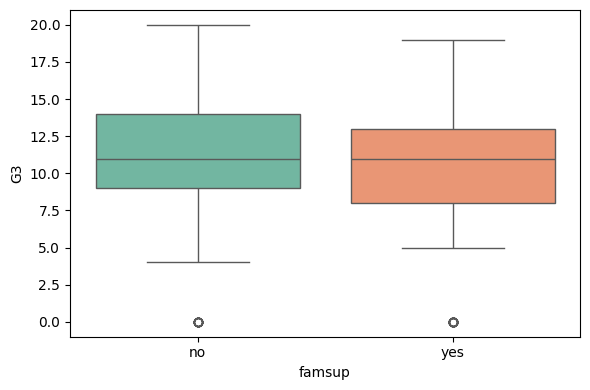

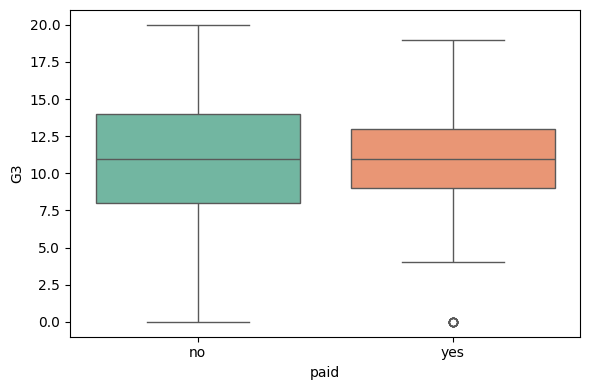

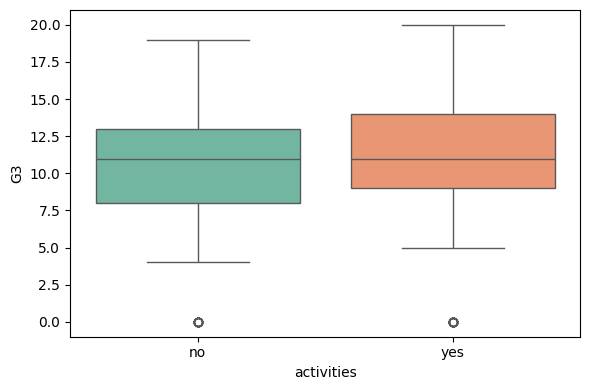

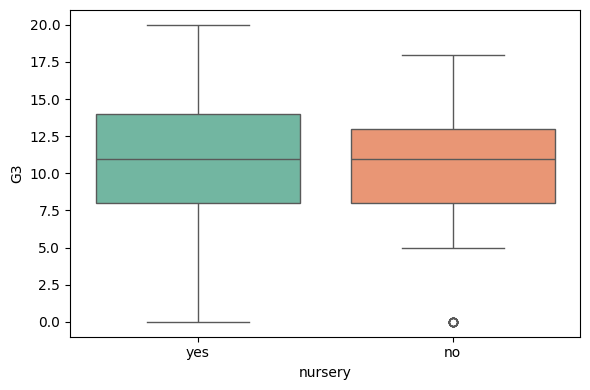

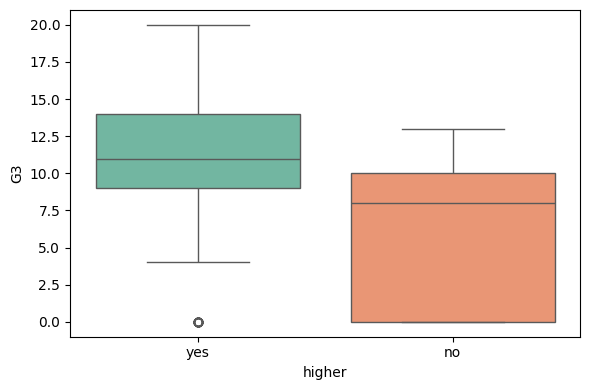

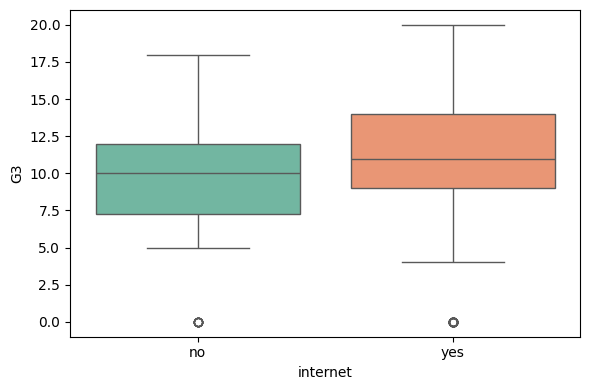

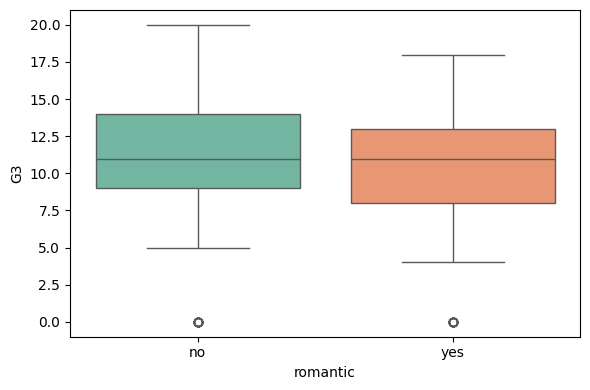

In [14]:
import seaborn as sns

# iterating through training data columns and create a boxplot for each categorical comparison
for i in X_train.columns:
    if X_train[i].dtype == 'object':
        plt.figure(figsize=(6,4)),
        sns.boxplot(x=i, y='G3', data=students, hue=i, palette='Set2')
        plt.tight_layout()
        plt.show()

The categorical features that will be selected for further analysis due to their initial differences in the above boxplots and the ability to create additional assistance to these students are "traveltime", "address", "internet", and "higher".

The following boxplots display that with increased travel times to and from school, the overall final grade performance decreases.  50% of the students with travel times of more than 15 minutes were failing.  When the travel time is more than an hour, all (100%) of those students have a final grade of a low C or is failing.  Every category has outliers of students that have a zero as a final grade, which most likely are students that did not attend class and should be evaluated further on their own.  Additional resources supporting shorter commute times for students could improve scholastic performance for students with travel times of greater than 15 minutes.   

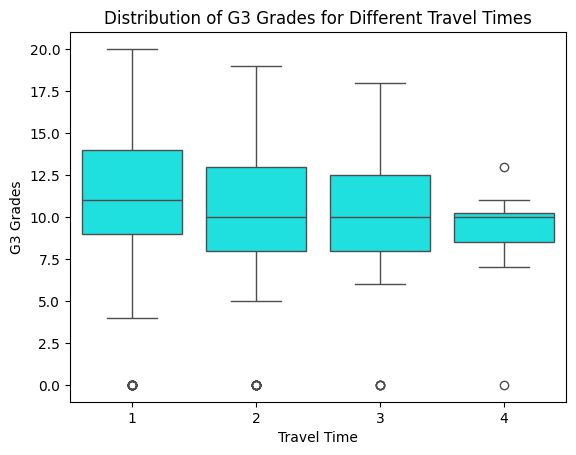

In [15]:
# creating boxplots to visualize the difference in 'G3' grades for student's travel times
sns.boxplot(x='traveltime', y='G3', data=students, color='cyan')
plt.title('Distribution of G3 Grades for Different Travel Times')
plt.xlabel('Travel Time')
plt.ylabel('G3 Grades')
plt.show()

In researching "traveltime" further with additional boxplots below with urban students in green and rural students represented in orange, rural students perform consistently worse than urban students at the 75% quartile mark across all travel times.  This data supports the need for additional resources (such as additional bus routes) for rural students to reduce their travel times to and from school which could potentially help improve their scholastic performances.

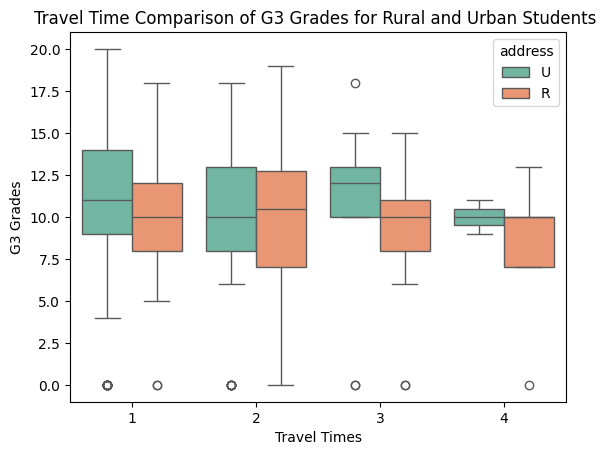

In [16]:
# creating boxplots to visualize the difference in 'G3' grades for rural and urban student's travel times
sns.boxplot(x='traveltime', y='G3', hue='address', data=students, palette='Set2')
plt.title('Travel Time Comparison of G3 Grades for Rural and Urban Students ')
plt.xlabel('Travel Times')
plt.ylabel('G3 Grades')
plt.show()

16.1% of students do not have internet access at home and the following boxplot shows that those students perform worse scholastically in general than the students who have internet access at home.  

In [17]:
# checking value count percentages for "internet" feature
X_train['internet'].value_counts(normalize=True)

internet
yes    0.838608
no     0.161392
Name: proportion, dtype: float64

As illustrated by the boxplots, the students without internet access at home performed scholastically worse overall than the students who had access to internet at home.  75% of students that did not have internet access at home had a final grade of a low C or were failing, with 50% of them outright failing.  Additional resources to provide access to internet to the students that lack it at home may improve their scholastic performance.

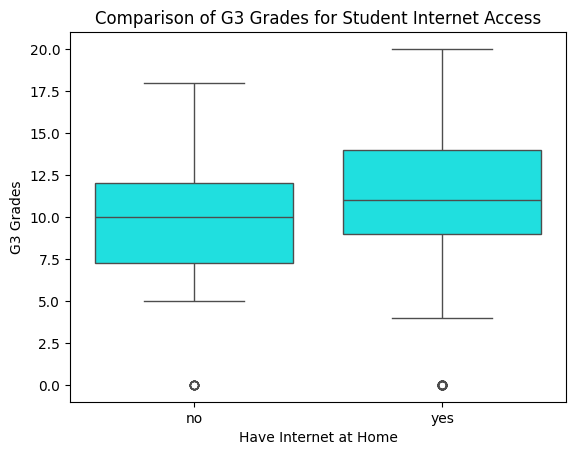

In [18]:
# creating boxplots to visualize the difference in grades between students internet access
sns.boxplot(x='internet', y='G3', data=students, color='cyan')
plt.title('Comparison of G3 Grades for Student Internet Access')
plt.xlabel('Have Internet at Home')
plt.ylabel('G3 Grades')
plt.show()

5.7% of students do not want to take higher education and of those students, as displayed in the boxplot, approximately 75% of them have failing G3 final grades.  Since a majority of this group of students are failing additional resources such as educational outreach programs could prove beneficial to those student's scholastic performance.  

In [19]:
#  checking value count percentages for "higher" feature
X_train['higher'].value_counts(normalize=True)

higher
yes    0.943038
no     0.056962
Name: proportion, dtype: float64

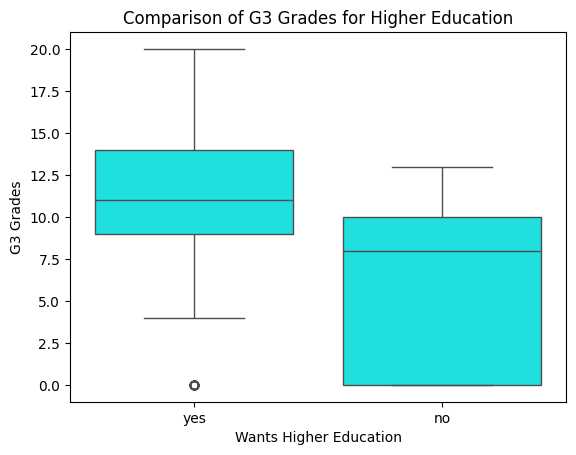

In [20]:
# creating boxplots comparing students who want higher education and their final grades vs students who don't
sns.boxplot(x='higher', y='G3', data=students, color='cyan')
plt.title('Comparison of G3 Grades for Higher Education')
plt.xlabel('Wants Higher Education')
plt.ylabel('G3 Grades')
plt.show()

### Correlations Between Attributes
The following code block uses the .corr() function to compute the pairwise correlation of columns, resulting in a correlation matrix where each cell has the correlation coefficient.
The correlation coefficient ranges from -1 to 1, where: 1 is a perfect positive linear relationship, -1 is a perfect negative linear relationship, and 0 is no linear relationship.

As expected, the target attribute, G3 final grades, has a strong positive linear relationship with attributes G1 (0.8) and G2 (0.9) grade terms in the correlation matrix below.

In [21]:
num_cols = ['absences_G1', 'absences_G2', 'absences_G3','G1','G2','G3']

# computing correlations between numerical data
corr_matrix = students[num_cols].corr()
corr_matrix

,absences_G1,absences_G2,absences_G3,G1,G2,G3
absences_G1,1.000000,1.000000,0.954753,-0.026935,-0.035119,0.012485
absences_G2,1.000000,1.000000,0.954753,-0.026935,-0.035119,0.012485
absences_G3,0.954753,0.954753,1.000000,-0.004900,-0.003028,0.067294
G1,-0.026935,-0.026935,-0.004900,1.000000,0.852118,0.801468
G2,-0.035119,-0.035119,-0.003028,0.852118,1.000000,0.904868
G3,0.012485,0.012485,0.067294,0.801468,0.904868,1.000000


In [22]:
# sorting the correlation matrix values from highest correlation to G3 to lowest correlation
corr_matrix["G3"].sort_values(ascending=False)

G3             1.000000
G2             0.904868
G1             0.801468
absences_G3    0.067294
absences_G1    0.012485
absences_G2    0.012485
Name: G3, dtype: float64

## Prepare the Data:

### Feature Selection

Based on the exploratory analysis, the features selected were 'address', 'traveltime', 'higher', and 'internet' due to the possible programs that can be implemented with each feature to improve the scholastic performance of students that could benefit from additional resources.  Possible programs could be to offer more effective bus routes to ensure that the traveltimes of students that commute more than an hour be shortened.  Additional programs that offer an "internet schedule" where students without acces to the internet at home be given additional access for schoolwork, and outreach programs that discuss how important attendence and higher education is to parents and students.

In addition, "absences_G1", "absences_G2", and "absences_G3" will be aggregated to create a new column named "total_absences" as a new feature/attribute for the models, then the models will be analyzed with and without the G1 and G2 columns to evaluate the performance of each.

### Feature Scaling on Continuous Numeric Data and Filling-In Missing Values Inside a Pipeline

MinMaxScaler() is being used on the continuous numerical data instead of StandardScaler() because some features are not normally distributed and MinMaxScaler() scales features from range zero to one.  The predictions proved to be slightly better for the model's performance in the end.  

SimpleImputer was also used to fill in missing values with the 'median' for numerical data and the 'most_frequent' for categorical data in their respecitve pipelines.

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# creating a pipeline to prepare the numerical data
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler().set_output(transform="pandas")
)

### Ordinal Encoder for Binary and Ordinal Data
OrdinalEncoder is used to preprocess and transform categorical data into a numerical format that machine learning can use for its models.

In [24]:
from sklearn.preprocessing import OrdinalEncoder

# creating a pipeline to prepare the categorical data
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OrdinalEncoder()
)

### Column Transformer 
The following column transformer pulls the numerical and categorical attributes and runs them thru their respective numerical and categorical pipelines to preprocess the data by scaling it, filling in missing values, and encoding categorical data as needed all in a single operation.

In [25]:
from sklearn.compose import ColumnTransformer

# lists of column names for numerical and categorical columns
num_attributes = ['absences_G1', 'absences_G2', 'absences_G3','G1','G2']
cat_attributes = ['address', 'traveltime', 'higher','internet']

# creating full pipeline to preprocess numerical and categorical features together
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes),
])

# fits the preprocessing transformation to the training data (X_train) and then transforms X_train
X_train_prepared = preprocessing.fit_transform(X_train)

The following code converts the X_train_prepared data into a pandas DataFrame for ease of analysis.

In [26]:
# converting X_train_prepared from numpy array to dataframe
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=num_attributes + cat_attributes)
X_train_prepared_df

,absences_G1,absences_G2,absences_G3,G1,G2,address,traveltime,higher,internet
0,0.000000,0.000000,0.039216,0.500000,0.684211,1.0,0.0,1.0,1.0
1,0.000000,0.000000,0.000000,0.571429,0.736842,1.0,1.0,1.0,1.0
2,0.000000,0.000000,0.000000,0.214286,0.368421,1.0,0.0,1.0,1.0
3,0.000000,0.000000,0.039216,0.357143,0.473684,1.0,0.0,1.0,1.0
4,0.000000,0.000000,0.000000,0.214286,0.473684,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
311,0.000000,0.000000,0.000000,0.357143,0.526316,1.0,0.0,1.0,1.0
312,0.000000,0.000000,0.078431,0.142857,0.421053,1.0,0.0,1.0,1.0
313,0.166667,0.166667,0.215686,0.285714,0.473684,1.0,0.0,1.0,1.0
314,0.000000,0.000000,0.000000,0.571429,0.789474,1.0,0.0,1.0,1.0


### Correlations Between Attributes
Correlation matrix of all the features/attributes that will be used for the machine learning models.  These include the categorical attributes after scaling and preprocessing them.

In [27]:
# converting X_train_prepared from numpy array to a dataframe
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=num_attributes + cat_attributes)

# creating a combined dataframe
combined_df = pd.concat([X_train_prepared_df, pd.Series(y_train, name='G3')], axis=1)

# checking correlations
corr_matrix = combined_df.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3             1.000000
absences_G1    0.101712
absences_G2    0.101712
absences_G3    0.101627
higher         0.039514
address        0.035655
internet       0.031972
G1            -0.035527
G2            -0.041303
traveltime    -0.077363
Name: G3, dtype: float64

In [28]:
# correct column names
correct_column_names = ['absences_G1', 'absences_G2', 'absences_G3','G1','G2','address', 'traveltime', 'higher','internet']

# reassigning the correct column names to the DataFrame
X_train_prepared_df.columns = correct_column_names

### Custom Transformer
Creates a new column in the data that sums the 'absences_G1', 'absences_G2', and 'absences_G3' data and then drops those three columns.  It also has a parameter that when equal to True, drops the G1 and G2 columns, and when False, leaves the columns in the data. 

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# assigning the column names to their index with all rows of data for each included
absences_G1, absences_G2, absences_G3, G1, G2 = X_train_prepared_df.iloc[:, :5]

class Combined_G1G2G3_absences(BaseEstimator, TransformerMixin):
    def __init__(self, drop_G1G2 = True):
        self.drop_G1G2 = drop_G1G2
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):

        # preserving original data
        X_copy = X.copy() 

        # ensuring X is a DataFrame
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        
        # creating a new column that sums the absences_G1, absences_G2, and absences_G3
        total_absences = X_copy[absences_G1] + X_copy[absences_G2] +  X_copy[absences_G3]
        X_copy['total_absences'] = total_absences
        
        # dropping G1,G2,G3 absences columns
        X_copy.drop(columns=['absences_G1', 'absences_G2', 'absences_G3'], inplace=True)
        
        if self.drop_G1G2:
            # dropping the G1 and G2 columns if self.drop_G1G2 is True
            X_copy.drop(columns=['G1','G2'], inplace=True)
          
            return pd.DataFrame(X_copy)
    
        else:
            
            return pd.DataFrame(X_copy)
        

### Transform Training Data into Two Training Sets With/Without G1 and G2 Columns

Preprocessing pipelines that transforms X_train_prepared_df with and witout G1/G2 columns and outputs the shapes of each training set.

In [30]:
from sklearn.preprocessing import StandardScaler

# preprocessing pipeline with the custom transformer for dropping 'G1' and 'G2' columns
preprocessing_woG1G2 = make_pipeline(
    Combined_G1G2G3_absences(drop_G1G2=True),
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

# custom transformer set to False
preprocessing_wG1G2 = make_pipeline(
    Combined_G1G2G3_absences(drop_G1G2=False),
    SimpleImputer(strategy="mean"),    
    StandardScaler()
)

# fitting and transforming the training data using the pipelines
X_train_transformed_woG1G2 = preprocessing_woG1G2.fit_transform(X_train_prepared_df)
X_train_transformed_wG1G2 = preprocessing_wG1G2.fit_transform(X_train_prepared_df)

# outputting the shapes of the transformed training sets
print("Shape of transformed training set without G1/G2 columns:", X_train_transformed_woG1G2.shape)
print("Shape of transformed training set with G1/G2 columns:", X_train_transformed_wG1G2.shape)

Shape of transformed training set without G1/G2 columns: (316, 5)
Shape of transformed training set with G1/G2 columns: (316, 7)


The output of the transformed dataset above is a Numpy Array, to be able to analyze better will convert to Pandas DataFrame (which outputs similiar to excel file).

In [31]:
# converting X_train_transformed_wG1G2 as a numpy array to pandas dataframe
X_train_transformed_wG1G2_df = pd.DataFrame(X_train_transformed_wG1G2)
X_train_transformed_wG1G2_df

,0,1,2,3,4,5,6
0,0.332050,0.626163,0.528538,-0.625779,0.24577,0.438694,-0.484361
1,0.643409,0.892831,0.528538,0.828236,0.24577,0.438694,-0.601714
2,-0.913385,-0.973844,0.528538,-0.625779,0.24577,0.438694,-0.601714
3,-0.290667,-0.440508,0.528538,-0.625779,0.24577,0.438694,-0.484361
4,-0.913385,-0.440508,-1.892012,0.828236,0.24577,-2.279491,-0.601714
...,...,...,...,...,...,...,...
311,-0.290667,-0.173840,0.528538,-0.625779,0.24577,0.438694,-0.601714
312,-1.224743,-0.707176,0.528538,-0.625779,0.24577,0.438694,-0.367008
313,-0.602026,-0.440508,0.528538,-0.625779,0.24577,0.438694,1.041232
314,0.643409,1.159499,0.528538,-0.625779,0.24577,0.438694,-0.601714


The following code block retrieves the column names of X_train_transformed_wG1G2_df after transformation because the output above gives only the index numbers.

In [32]:
# checking columns before transformation
print("Columns before transformation:", X_train_prepared_df.columns)

# instantiating the Combined_G1G2G3_absences transformer
combined_transformer = Combined_G1G2G3_absences(drop_G1G2=False)

# transforming the data
X_transformed_wG1G2 = combined_transformer.transform(X_train_prepared_df)

# checking the columns of the transformed dataframe
print("Columns after transformation:", X_transformed_wG1G2.columns)

Columns before transformation: Index(['absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', 'address',
       'traveltime', 'higher', 'internet'],
      dtype='object')
Columns after transformation: Index(['G1', 'G2', 'address', 'traveltime', 'higher', 'internet',
       'total_absences'],
      dtype='object')


Updating the index numbers with their correct column names for the dataframe.

In [33]:
# correct column names index order
correct_column_names = ['G1', 'G2', 'address','traveltime','higher','internet','total_absences']

# reassigning the correct column names to the dataframe
X_train_transformed_wG1G2_df.columns = correct_column_names
X_train_transformed_wG1G2_df

,G1,G2,address,traveltime,higher,internet,total_absences
0,0.332050,0.626163,0.528538,-0.625779,0.24577,0.438694,-0.484361
1,0.643409,0.892831,0.528538,0.828236,0.24577,0.438694,-0.601714
2,-0.913385,-0.973844,0.528538,-0.625779,0.24577,0.438694,-0.601714
3,-0.290667,-0.440508,0.528538,-0.625779,0.24577,0.438694,-0.484361
4,-0.913385,-0.440508,-1.892012,0.828236,0.24577,-2.279491,-0.601714
...,...,...,...,...,...,...,...
311,-0.290667,-0.173840,0.528538,-0.625779,0.24577,0.438694,-0.601714
312,-1.224743,-0.707176,0.528538,-0.625779,0.24577,0.438694,-0.367008
313,-0.602026,-0.440508,0.528538,-0.625779,0.24577,0.438694,1.041232
314,0.643409,1.159499,0.528538,-0.625779,0.24577,0.438694,-0.601714


Doing the same process as above to update the index numbers to their proper column names for the X_train_transformed_woG1G2 dataset in the following three code blocks.

In [34]:
# converting X_train_transformed_wG1G2 from numpy array to pandas dataframe
X_train_transformed_woG1G2_df = pd.DataFrame(X_train_transformed_woG1G2)
X_train_transformed_woG1G2_df

,0,1,2,3,4
0,0.528538,-0.625779,0.24577,0.438694,-0.484361
1,0.528538,0.828236,0.24577,0.438694,-0.601714
2,0.528538,-0.625779,0.24577,0.438694,-0.601714
3,0.528538,-0.625779,0.24577,0.438694,-0.484361
4,-1.892012,0.828236,0.24577,-2.279491,-0.601714
...,...,...,...,...,...
311,0.528538,-0.625779,0.24577,0.438694,-0.601714
312,0.528538,-0.625779,0.24577,0.438694,-0.367008
313,0.528538,-0.625779,0.24577,0.438694,1.041232
314,0.528538,-0.625779,0.24577,0.438694,-0.601714


In [35]:
# checking columns before transformation
print("Columns before transformation:", X_train_prepared_df.columns)

# instantiating the Combined_G1G2G3_absences transformer
combined_transformer = Combined_G1G2G3_absences(drop_G1G2=True)

# transforming the data
X_transformed_woG1G2 = combined_transformer.transform(X_train_prepared_df)

# checking the column names index order of the transformed dataframe
print("Columns after transformation:", X_transformed_woG1G2.columns)

Columns before transformation: Index(['absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', 'address',
       'traveltime', 'higher', 'internet'],
      dtype='object')
Columns after transformation: Index(['address', 'traveltime', 'higher', 'internet', 'total_absences'], dtype='object')


In [36]:
# correcting column names index order
correct_column_names_woG1G2 = ['address', 'traveltime', 'higher','internet','total_absences']

# reassigning the correct column names to the DataFrame
X_train_transformed_woG1G2_df.columns = correct_column_names_woG1G2
X_train_transformed_woG1G2_df

,address,traveltime,higher,internet,total_absences
0,0.528538,-0.625779,0.24577,0.438694,-0.484361
1,0.528538,0.828236,0.24577,0.438694,-0.601714
2,0.528538,-0.625779,0.24577,0.438694,-0.601714
3,0.528538,-0.625779,0.24577,0.438694,-0.484361
4,-1.892012,0.828236,0.24577,-2.279491,-0.601714
...,...,...,...,...,...
311,0.528538,-0.625779,0.24577,0.438694,-0.601714
312,0.528538,-0.625779,0.24577,0.438694,-0.367008
313,0.528538,-0.625779,0.24577,0.438694,1.041232
314,0.528538,-0.625779,0.24577,0.438694,-0.601714


## Shortlist Promising Models:
Fitting and Comparing 4 Models With and Without the G1/G2 Columns with Cross Validation

### Model #1: Ordinary Least Squares Linear Regression Models With and Without G1 and G2 Columns

In [37]:
from sklearn.linear_model import LinearRegression

# instantiating LinearRegression() class
ols_model_wG1G2 = LinearRegression()
# fitting preprocessed data to linear model with G1G2
ols_model_wG1G2.fit(X_train_transformed_wG1G2_df, y_train)

LinearRegression()

In [38]:
# instantiating LinearRegression() class
ols_model_woG1G2 = LinearRegression()
# fitting preprocessed data to linear model without G1G2
ols_model_woG1G2.fit(X_train_transformed_woG1G2_df, y_train)

LinearRegression()

### Comparing Ordinary Least Squares Model With and Without the G1G2 Columns with Cross Validation
The ols model with G1G2 is the better performing model between the two ols models because it has a lower root mean squared error average of 1.87 vs 4.50.

In [39]:
from sklearn.model_selection import cross_val_score

# linear regression model (wG1G2) with a 10-fold cross validation
ols_model_rmses_wG1G2 = -cross_val_score(ols_model_wG1G2, X_train_transformed_wG1G2_df, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [40]:
pd.Series(ols_model_rmses_wG1G2).describe()

count    10.000000
mean      1.874885
std       0.408058
min       1.189420
25%       1.670956
50%       1.878672
75%       1.980897
max       2.630797
dtype: float64

In [41]:
# linear regression model (woG1G2) with a 10-fold cross validation
ols_model_rmses_woG1G2 = -cross_val_score(ols_model_woG1G2, X_train_transformed_woG1G2_df, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [42]:
pd.Series(ols_model_rmses_woG1G2).describe()

count    10.000000
mean      4.498890
std       0.561085
min       3.440111
25%       4.071511
50%       4.735462
75%       4.928250
max       5.057712
dtype: float64

### Model #2: Stochastic Gradient Descent Regression Model With and Without G1 and G2 Columns

In [43]:
from sklearn.linear_model import SGDRegressor

# from class notes on sgd models
# max_iter = max number of epochs
# penalty = regularization term
# learning_rate = constant
# n_iter_no_change = number of iterations without improvement before stopping

# instantiating SDGRegressor() for stochastic gradient descent model 
sgd_model = SGDRegressor(max_iter=1000, penalty=None, learning_rate='constant',
                       n_iter_no_change=100, random_state=42)

## Fine-Tune the System:

### Grid Search Used to Fine-Tune Hyperparameters of SGD Model

GridSearchCV automates the process of searching for the best combination of hyperparameters and then saves the best model to sgd_model with or without G1G2 to be able to compare the algorithms in the end.

In [44]:
from sklearn.model_selection import GridSearchCV

# creating a dictionary of hyperparameter values
sgd_param_grid = {'eta0': [.05, .01, .09],
                  'tol': [1e-1, 1e-3, 1e-5, 1e-7]}

# instantiating GridSearchCV()
grid_search_cv_sgd = GridSearchCV(sgd_model,
                              sgd_param_grid, verbose=1, cv=10)

# fitting the grid search model and printing the best parameters
grid_search_cv_sgd.fit(X_train_transformed_wG1G2_df, y_train)
print("The best parameters are: ", grid_search_cv_sgd.best_params_)

# saving the best model using the hyperparameters from the grid search
sgd_model_wG1G2 = grid_search_cv_sgd.best_estimator_

Fitting 10 folds for each of 12 candidates, totalling 120 fits
The best parameters are:  {'eta0': 0.01, 'tol': 0.001}


In [45]:
# creating a dictionary of hyperparameter values
sgd_param_grid = {'eta0': [.1, .01, .001],
                  'tol': [1e-1, 1e-3, 1e-5, 1e-7]}

# instantiating GridSearchCV()
grid_search_cv_sgd = GridSearchCV(sgd_model,
                              sgd_param_grid, verbose=1, cv=10)

# fitting the grid search model and prints the best parameters
grid_search_cv_sgd.fit(X_train_transformed_woG1G2_df, y_train)
print("The best parameters are: ", grid_search_cv_sgd.best_params_)

# saving the best model using the hyperparameters from the grid search
sgd_model_woG1G2 = grid_search_cv_sgd.best_estimator_

Fitting 10 folds for each of 12 candidates, totalling 120 fits
The best parameters are:  {'eta0': 0.01, 'tol': 0.001}


### Comparing Stochastic Gradient Descent Models With and Without the G1G2 Columns with Cross Validation
The sgd model with G1G2 is the better performing model between the two sgd models because it has a lower root mean squared error average of 1.85 vs 4.47.

In [46]:
# sgd model wG1G2 and a 10-fold cross validation
sgd_model_rmses_wG1G2 = -cross_val_score(sgd_model_wG1G2, X_train_transformed_wG1G2_df, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [47]:
pd.Series(sgd_model_rmses_wG1G2).describe()

count    10.000000
mean      1.858842
std       0.436829
min       1.157393
25%       1.639408
50%       1.859638
75%       1.957953
max       2.645517
dtype: float64

In [48]:
# sgd model wG1G2 and a 10-fold cross validation
sgd_model_rmses_woG1G2 = -cross_val_score(sgd_model_woG1G2, X_train_transformed_woG1G2_df, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [49]:
pd.Series(sgd_model_rmses_woG1G2).describe()

count    10.000000
mean      4.474688
std       0.572744
min       3.400398
25%       4.050521
50%       4.790134
75%       4.894226
max       5.023795
dtype: float64

### Model #3: Ridge Regression Models With and Without G1 and G2 Columns

In [50]:
from sklearn.linear_model import Ridge

# instantiating RidgeRegression() class
ridge_model = Ridge(random_state=42)

### Grid Search Used to fine-tune hyperparameters of Ridge Regression Model
GridSearchCV automates the process of searching for the best combination of hyperparameters and then saves the best model to ridge_model with or without G1G2 to be able to compare the algorithms in the end.

In [51]:
# creating a dictionary of hyperparameter values
ridge_param_grid = {'alpha': [1e-1, 1e-3, 1e-5, 1e-7]}

# instantiating GridSearchCV()
grid_search_cv_ridge = GridSearchCV(ridge_model,
                              ridge_param_grid, verbose=1, cv=10)

# fitting the grid search model and printes the best parameters
grid_search_cv_ridge.fit(X_train_transformed_wG1G2_df, y_train)
print("The best parameters are: ", grid_search_cv_ridge.best_params_)

# saving the best model using the hyperparameters from the grid search
ridge_model_wG1G2 = grid_search_cv_ridge.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits
The best parameters are:  {'alpha': 1e-07}


In [52]:
# creating a dictionary of hyperparameter values
ridge_param_grid = {'alpha': [50, 60, 70, 80, 90, 100, 125, 150]}

# instantiating GridSearchCV()
grid_search_cv_ridge = GridSearchCV(ridge_model,
                              ridge_param_grid, verbose=1, cv=10)

# fitting the grid search model and printes the best parameters
grid_search_cv_ridge.fit(X_train_transformed_woG1G2_df, y_train)
print("The best parameters are: ", grid_search_cv_ridge.best_params_)

# saving the best model using the hyperparameters from the grid search
ridge_model_woG1G2 = grid_search_cv_ridge.best_estimator_

Fitting 10 folds for each of 8 candidates, totalling 80 fits
The best parameters are:  {'alpha': 150}


### Comparing Ridge Regression Models With and Without the G1G2 Columns with Cross Validation¶
The ridge regression model with G1G2 is the better performing model between the two ridge regression models because it has a lower root mean squared error average of 1.87 vs 4.48.

In [53]:
# ridge model with G1G2 and 10-fold cross validation 
ridge_model_rmses_wG1G2 = -cross_val_score(ridge_model_wG1G2, X_train_transformed_wG1G2_df, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

# checking cross validation scores
pd.Series(ridge_model_rmses_wG1G2).describe()

count    10.000000
mean      1.874885
std       0.408058
min       1.189420
25%       1.670956
50%       1.878672
75%       1.980897
max       2.630797
dtype: float64

In [54]:
# ridge model without G1G2 and 10-fold cross validation 
ridge_model_rmses_woG1G2 = -cross_val_score(ridge_model_woG1G2, X_train_transformed_woG1G2_df, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

# checking cross validation scores
pd.Series(ridge_model_rmses_woG1G2).describe()

count    10.000000
mean      4.476608
std       0.585585
min       3.478075
25%       4.043145
50%       4.763027
75%       4.925242
max       5.079109
dtype: float64

### Model #4: Random Forest Regressor Models With and Without G1 and G2 Columns

In [55]:
from sklearn.ensemble import RandomForestRegressor

# instantiating a RandomForestRegressor class
forest_reg_wG1G2 = RandomForestRegressor(random_state=42)

# fitting the model
forest_reg_wG1G2.fit(X_train_transformed_wG1G2_df, y_train)

RandomForestRegressor(random_state=42)

In [56]:
# instantiating a RandomForestRegressor class
forest_reg_woG1G2 = RandomForestRegressor(random_state=42)

# fitting the model
forest_reg_woG1G2.fit(X_train_transformed_woG1G2_df, y_train)

RandomForestRegressor(random_state=42)

### Comparing Random Forest Regressor Models With and Without the G1G2 Columns with Cross Validation¶
The random forest regression model with G1G2 is the better performing model between the two random forest models because it has a lower root mean squared error average of 1.77 vs 4.48.  Including the G1 and G2 columns in our model increasing it's performance by 39.9%.  The random forest model with G1 and G2 is also the best performing model out of all four models with the lowest average RMSE and will be selected as the final model.

In [57]:
# random forest model with G1G2 and 10-fold cross validation 
rmse_forest_wG1G2 = -cross_val_score(forest_reg_wG1G2, X_train_transformed_wG1G2_df, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

# check cross validation scores
pd.Series(rmse_forest_wG1G2).describe()

count    10.000000
mean      1.765773
std       0.441987
min       1.164237
25%       1.563400
50%       1.751416
75%       2.021450
max       2.634462
dtype: float64

In [58]:
# ridge model without G1G2 and 10-fold cross validation 
rmse_forest_woG1G2 = -cross_val_score(forest_reg_woG1G2, X_train_transformed_woG1G2_df, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

# checking cross validation scores
pd.Series(rmse_forest_woG1G2).describe()

count    10.000000
mean      4.483325
std       0.799540
min       2.978485
25%       3.907336
50%       4.642385
75%       5.075614
max       5.421725
dtype: float64

The Random Forrest Regression model with the G1 and G2 columns is the best model (lowest average Root Mean Square Error, RMSE) based on training data with cross validation out of the 4 models that were compared by the performance metric of RMSE.

### Transform Testing Data Using Data Preparation Pipelines

In [59]:
# transforming X_test data thru the preprocessing pipeline from before
X_test_prepared = preprocessing.transform(X_test)

In [60]:
# converting X_train_prepared from numpy array to DataFrame
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=num_attributes + cat_attributes)
X_test_prepared_df

,absences_G1,absences_G2,absences_G3,G1,G2,address,traveltime,higher,internet
0,0.000000,0.000000,0.039216,0.214286,0.421053,1.0,1.0,0.0,1.0
1,0.000000,0.000000,0.058824,0.642857,0.631579,0.0,2.0,0.0,1.0
2,0.083333,0.083333,0.117647,-0.142857,0.263158,0.0,0.0,1.0,1.0
3,0.083333,0.083333,0.117647,0.214286,0.473684,1.0,0.0,1.0,1.0
4,0.083333,0.083333,0.176471,0.285714,0.473684,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
74,0.000000,0.000000,0.000000,0.500000,0.578947,0.0,1.0,1.0,0.0
75,0.083333,0.083333,0.156863,0.142857,0.315789,1.0,0.0,1.0,1.0
76,0.083333,0.083333,0.117647,0.285714,0.473684,0.0,0.0,1.0,1.0
77,0.000000,0.000000,0.039216,0.714286,0.736842,1.0,0.0,1.0,1.0


In [61]:
# transforming the testing data using the pipelines
X_test_transformed_woG1G2 = preprocessing_woG1G2.transform(X_test_prepared_df)
X_test_transformed_wG1G2 = preprocessing_wG1G2.transform(X_test_prepared_df)

# outputting the shapes of the transformed testing sets
print("Shape of transformed training set without G1/G2 columns:", X_test_transformed_woG1G2.shape)
print("Shape of transformed training set with G1/G2 columns:", X_test_transformed_wG1G2.shape)

Shape of transformed training set without G1/G2 columns: (79, 5)
Shape of transformed training set with G1/G2 columns: (79, 7)


In [62]:
# converting X_train_transformed_wG1G2 to a dataframe
X_test_transformed_woG1G2_df = pd.DataFrame(X_test_transformed_woG1G2)
X_test_transformed_woG1G2_df

,0,1,2,3,4
0,0.528538,0.828236,-4.068852,0.438694,-0.484361
1,-1.892012,2.282252,-4.068852,0.438694,-0.425684
2,-1.892012,-0.625779,0.245770,0.438694,0.249097
3,0.528538,-0.625779,0.245770,0.438694,0.249097
4,0.528538,-0.625779,0.245770,-2.279491,0.425127
...,...,...,...,...,...
74,-1.892012,0.828236,0.245770,-2.279491,-0.601714
75,0.528538,-0.625779,0.245770,0.438694,0.366451
76,-1.892012,-0.625779,0.245770,0.438694,0.249097
77,0.528538,-0.625779,0.245770,0.438694,-0.484361


In [63]:
# correct column names
correct_column_names_woG1G2= ['address', 'traveltime', 'higher','internet','total_absences']

# reassigning the correct column names to the DataFrame
X_test_transformed_woG1G2_df.columns = correct_column_names_woG1G2
X_test_transformed_woG1G2_df

,address,traveltime,higher,internet,total_absences
0,0.528538,0.828236,-4.068852,0.438694,-0.484361
1,-1.892012,2.282252,-4.068852,0.438694,-0.425684
2,-1.892012,-0.625779,0.245770,0.438694,0.249097
3,0.528538,-0.625779,0.245770,0.438694,0.249097
4,0.528538,-0.625779,0.245770,-2.279491,0.425127
...,...,...,...,...,...
74,-1.892012,0.828236,0.245770,-2.279491,-0.601714
75,0.528538,-0.625779,0.245770,0.438694,0.366451
76,-1.892012,-0.625779,0.245770,0.438694,0.249097
77,0.528538,-0.625779,0.245770,0.438694,-0.484361


In [64]:
# converting X_train_transformed_wG1G2 to a dataframe
X_test_transformed_wG1G2_df = pd.DataFrame(X_test_transformed_wG1G2)
X_test_transformed_wG1G2_df

,0,1,2,3,4,5,6
0,-0.913385,-0.707176,0.528538,0.828236,-4.068852,0.438694,-0.484361
1,0.954768,0.359495,-1.892012,2.282252,-4.068852,0.438694,-0.425684
2,-2.470179,-1.507180,-1.892012,-0.625779,0.245770,0.438694,0.249097
3,-0.913385,-0.440508,0.528538,-0.625779,0.245770,0.438694,0.249097
4,-0.602026,-0.440508,0.528538,-0.625779,0.245770,-2.279491,0.425127
...,...,...,...,...,...,...,...
74,0.332050,0.092827,-1.892012,0.828236,0.245770,-2.279491,-0.601714
75,-1.224743,-1.240512,0.528538,-0.625779,0.245770,0.438694,0.366451
76,-0.602026,-0.440508,-1.892012,-0.625779,0.245770,0.438694,0.249097
77,1.266127,0.892831,0.528538,-0.625779,0.245770,0.438694,-0.484361


In [65]:
# correct column names
correct_column_names= ['G1', 'G2', 'address','traveltime','higher','internet','total_absences']

# reassigning the correct column names to the DataFrame
X_test_transformed_wG1G2_df.columns = correct_column_names
X_test_transformed_wG1G2_df

,G1,G2,address,traveltime,higher,internet,total_absences
0,-0.913385,-0.707176,0.528538,0.828236,-4.068852,0.438694,-0.484361
1,0.954768,0.359495,-1.892012,2.282252,-4.068852,0.438694,-0.425684
2,-2.470179,-1.507180,-1.892012,-0.625779,0.245770,0.438694,0.249097
3,-0.913385,-0.440508,0.528538,-0.625779,0.245770,0.438694,0.249097
4,-0.602026,-0.440508,0.528538,-0.625779,0.245770,-2.279491,0.425127
...,...,...,...,...,...,...,...
74,0.332050,0.092827,-1.892012,0.828236,0.245770,-2.279491,-0.601714
75,-1.224743,-1.240512,0.528538,-0.625779,0.245770,0.438694,0.366451
76,-0.602026,-0.440508,-1.892012,-0.625779,0.245770,0.438694,0.249097
77,1.266127,0.892831,0.528538,-0.625779,0.245770,0.438694,-0.484361


### Final Model Selection and Performance on Test Set
The final model selected is the Random Forest Regression Model with the G1 and G2 columns as it was the best performing model on training data from the four models.  It will be evaluated on the transformed test set to see how it generalizes and performs on the randomized test dataset.

In [66]:
# prediction for random forest model with G1G2 on transformed test data
forest_wG1G2_pred = forest_reg_wG1G2.predict(X_test_transformed_wG1G2_df)

In [67]:
from sklearn.metrics import mean_squared_error

# RMSE calculated with y_test and predictions for random forest model with G1G2rounded to 4 decimals
rmse_forest_wG1G2 = round(np.sqrt(mean_squared_error(y_test, forest_wG1G2_pred)),4)

In [68]:
from sklearn.metrics import r2_score

# R-squared value for random forest model with G1G2 rounded to 4 decimals
r2_forest_wG1G2 = round(r2_score(y_test,forest_wG1G2_pred),4)

In [69]:
print(f"RMSE (Forest): {rmse_forest_wG1G2}")
print("----------")
print(f"R-squared (Forest): {r2_forest_wG1G2}")

RMSE (Forest): 1.987
----------
R-squared (Forest): 0.8075


## Conclusion:

Given various student data collected from two Portuguese schools with students from 15-22 years old, the machine learning model of Random Forest Regression was selected as it performed 5.0% better than ordinary least squares, ridge regression, and stochastic gradient descent regression models on the training data to predict a student's performance based on select attributes.  The final model incorporated the G1 and G2 grades because omitting these terms resulted in the models performing approximately 40% worse. The Random Forest Regression model can be used to identify students that could benefit from additional assistance and interventions to improve their grade in the course, however, additional models including support vector machine regression can be tested to evaluate if the performance can be improved from Random Forest Regression.  

The model's attributes that were selected ('address', 'traveltime', 'higher', and 'internet') were based on the exploratory analysis due to the possible programs that can be implemented with each attribute to improve the scholastic performance of students that could benefit from additional resources. Possible programs could be to offer more effective bus routes to ensure that the traveltimes of students that commute more than an hour be shortened. Additional programs that offer an "internet schedule" where students without acces to the internet at home be given additional access for schoolwork, and outreach programs that discuss how important attendence and higher education is to parents and students.

The Random Forest Regression Model demonstrated to be the best model when compared to the ordinary least squares, ridge regression, and stochastic gradient descent regression models.  The final Random Forest Regression model with G1 and G2 grade terms had an average RMSE score of 1.987 and an R squared value of 0.8075 with the test data, which is an increase in average RMSE score from the training data (1.7658).  This drop in model performance could be an indication of the model overfitting the training data and the need for model regularization and further evaluation could be warranted.